#Project4- To perfom EDA and train the machine to predict the number of count of total rental bikes

In [1]:
#Importing some necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df_bike=pd.read_csv('hour.csv',parse_dates=["dteday"])
df_bike

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [7]:
# Checking datatypes of each variables
df_bike.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [5]:
#Checking for null values
df_bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

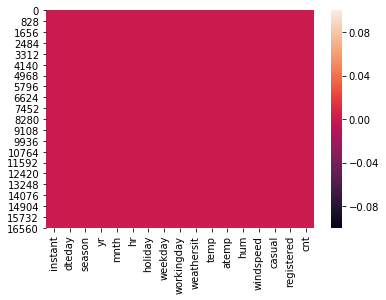

In [6]:
sns.heatmap(df_bike.isnull())

In [10]:
#Checking description of dataset
df_bike.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [9]:
#Making another dataframe to get easy and efficient insight over days,months and year criteria
df_bike_dates=pd.DataFrame()
df_bike_dates['Day']=df_bike['dteday'].dt.day_name()
df_bike_dates['Month']=df_bike['dteday'].dt.month_name()
df_bike_dates['Year']=df_bike['dteday'].dt.year
df_bike_dates['Counts']=df_bike['cnt']
df_bike_dates


,Day,Month,Year,Counts
0,Saturday,January,2011,16
1,Saturday,January,2011,40
2,Saturday,January,2011,32
3,Saturday,January,2011,13
4,Saturday,January,2011,1
...,...,...,...,...
17374,Monday,December,2012,119
17375,Monday,December,2012,89
17376,Monday,December,2012,90
17377,Monday,December,2012,61


In [24]:
# Grouping datasets to make it the data frame easy to understand
df=df_bike_dates.groupby(['Year','Month','Day'])
df.first()


Counts
Year Month     Day              
2011 April     Friday          6
               Monday          6
               Saturday       32
               Sunday         39
               Thursday       20
...                          ...
2012 September Saturday      168
               Sunday         99
               Thursday       65
               Tuesday        29
               Wednesday      37

[168 rows x 1 columns]

We can see that Groupby function makes the task of splitting the dataframe over some criteria really easy and efficient

--Performing EDA for the above data to get insight of data--

In [25]:
#Importing some more necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

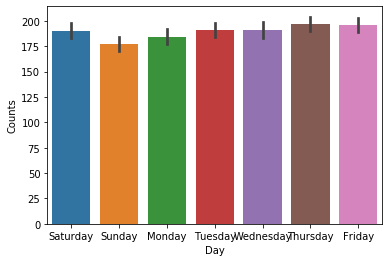

In [26]:
sns.barplot(y='Counts',x='Day',data=df_bike_dates)
plt.show()

We can see that least number of bike sharing on Sunday because of holiday

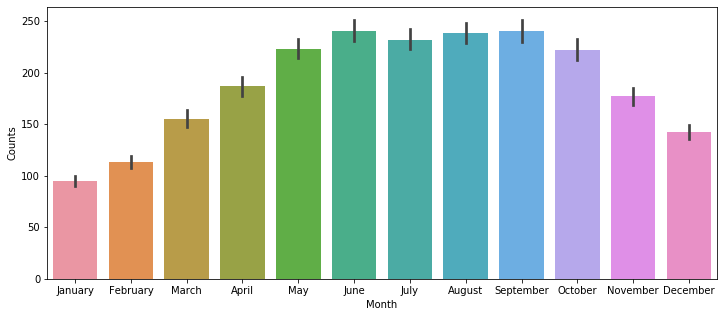

In [28]:
plt.figure(figsize=(12,5))
sns.barplot(x='Month',y='Counts',data=df_bike_dates)
plt.show()

We can see that less number of bike sharing in winter season from month December to February

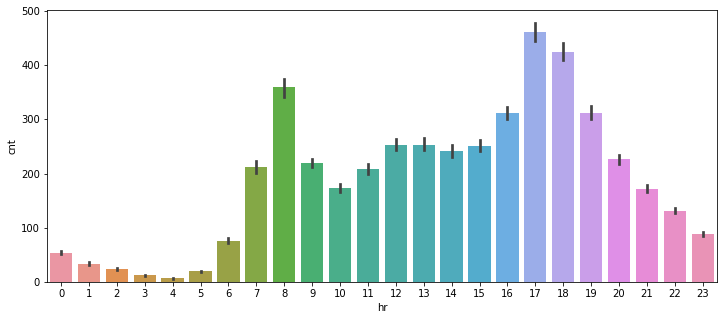

In [29]:
plt.figure(figsize=(12,5))
sns.barplot(x='hr',y='cnt',data=df_bike)
plt.show()

We can see that maximum bike sharing at morning 8am and in evening 5pm-6pm, these are work/office start and over time 

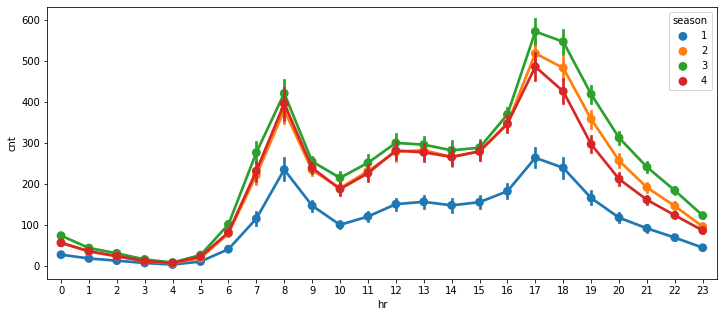

In [30]:
plt.figure(figsize=(12,5))
sns.pointplot(x="hr",y="cnt",hue="season",data=df_bike)
plt.show()

We can see that maximum bike sharing occurs on morning and evening office time in every season

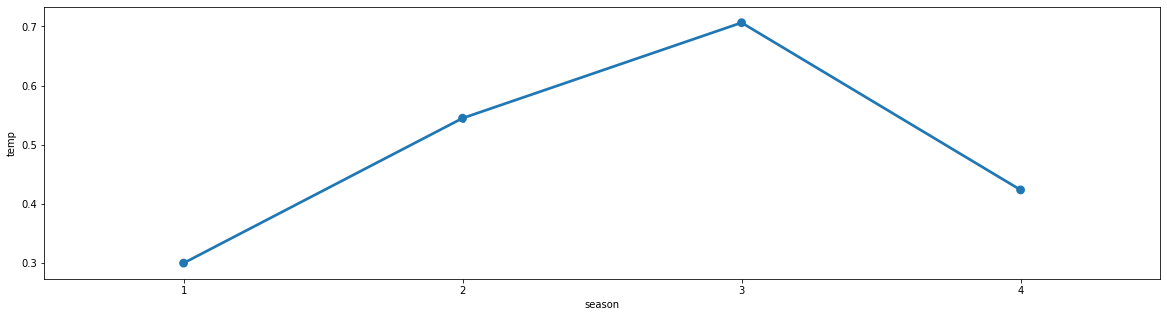

In [55]:
plt.figure(figsize=(20,5))
sns.pointplot(y="temp",x="season",data=df_bike)
plt.show()

We can evaluate that 1 stands for winter while 3 stands for summer by this plot

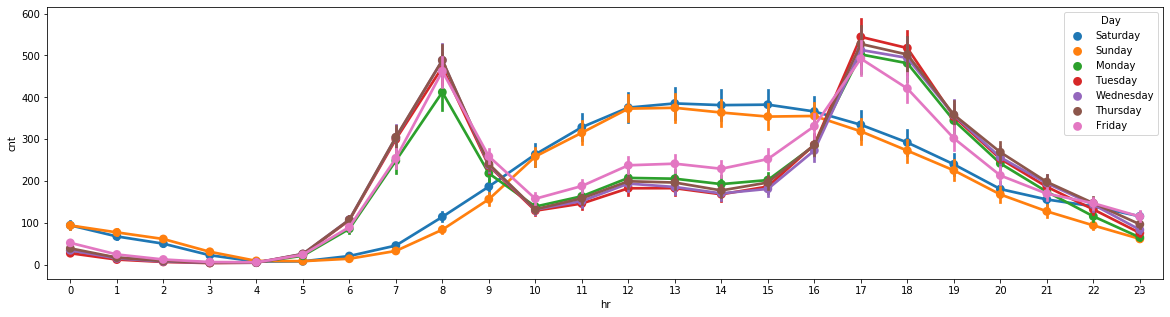

In [56]:
plt.figure(figsize=(20,5))
sns.pointplot(x=df_bike['hr'],y= df_bike['cnt'],hue=df_bike_dates['Day'])
plt.show()

We can see different Bike sharing pattern for Saturday and Sunday, as people go for hangout after 10am

<Figure size 1800x360 with 0 Axes>

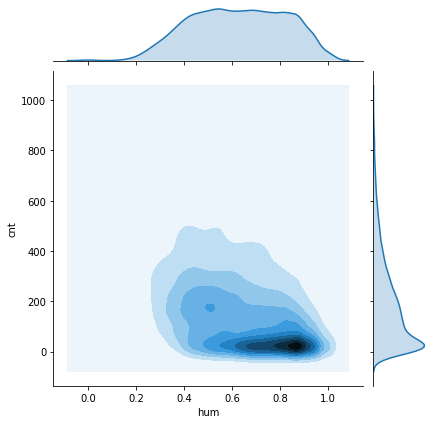

In [72]:
plt.figure(figsize=(25,5))
sns.jointplot(x='hum',y='cnt',data=df_bike,kind='kde')
plt.show()

We can see that less bike sharing on hign humid days,(In this Kernel Density plot, high density means lower count)

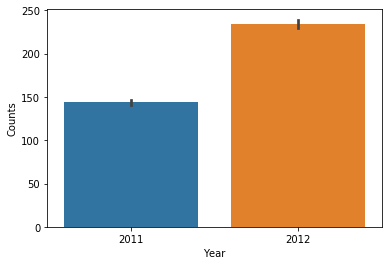

In [34]:
sns.barplot(y='Counts',x='Year',data=df_bike_dates)
plt.show()

We can see that bike sharing increased in year 2012 from year 2011

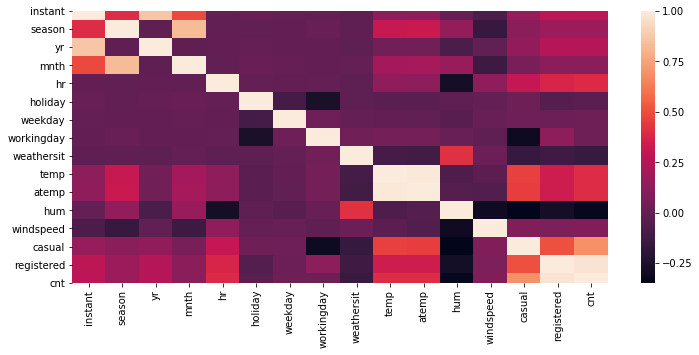

In [37]:
plt.figure(figsize=(12,5))
sns.heatmap(df_bike.corr())
plt.show()

C:\Users\Arjun Rao\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1291: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]


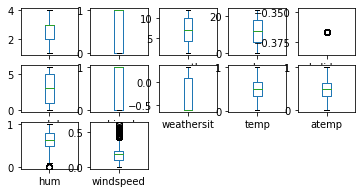

In [88]:
#Checking for outliers using box plot
#Lets seprate the input and ouput variable
df_x=df_bike.drop(columns=['instant','casual','registered','cnt','dteday'])
y=df_bike['cnt']
x.plot(kind='box',subplots=True,layout=(4,5))
plt.show()

** Training our machine to get best prediction model **

In [89]:
#Checking for skewness
df_x.skew()

season       -0.005416
yr           -0.010243
mnth         -0.009253
hr           -0.010680
holiday       5.638538
weekday      -0.002998
workingday   -0.785258
weathersit    1.228047
temp         -0.006021
atemp        -0.090429
hum          -0.111287
windspeed     0.574905
dtype: float64

We can see the skewness present in the data, we have to correct it

In [96]:
#Removing the positive  and negative skewness using log and square funtcions respectively
for index in df_x.skew().index:
    if df_x.skew().loc[index]>0.5:
        df_x[index]=np.log1p(df_x[index])
    if df_x.skew().loc[index]<-0.5:
        df_x[index]=np.square(df_x[index])

In [95]:
df_x.skew()

season       -0.005416
yr           -0.010243
mnth         -0.009253
hr           -0.010680
holiday       5.638538
weekday      -0.002998
workingday   -0.785258
weathersit    0.873602
temp         -0.006021
atemp        -0.090429
hum          -0.111287
windspeed     0.263926
dtype: float64

We can see that skewness has removed 

In [107]:
#Using standard scalar method to Normalize our data or to bring all variable to common scale
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(df_x)
x

array([[-1.3566343 , -1.0051343 , -1.61043792, ..., -1.0932806 ,
         0.9473725 , -1.66905826],
       [-1.3566343 , -1.0051343 , -1.61043792, ..., -1.18173227,
         0.89553869, -1.66905826],
       [-1.3566343 , -1.0051343 , -1.61043792, ..., -1.18173227,
         0.89553869, -1.66905826],
       ...,
       [-1.3566343 ,  0.99489192,  1.58846698, ..., -1.26960201,
        -0.14113744, -0.16641156],
       [-1.3566343 ,  0.99489192,  1.58846698, ..., -1.18173227,
        -0.34847267, -0.42356769],
       [-1.3566343 ,  0.99489192,  1.58846698, ..., -1.18173227,
         0.11803159, -0.42356769]])

#In this data set we can see that there is linear/continuos data for independable variable hence we use regression method to train and predict the variables

In [99]:
#Importing some neccessary libraries 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [100]:
#Checking for best random state which give best r2 score for various training techniques used to get best prediction
# Defining a function to check for best random state and r2 score.
def maxr2_score(tec,x,y):
    max_r_score=0
    for r_state in range(42,100):
        train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = r_state,test_size=0.20)
        tec.fit(train_x,train_y)
        pred = tec.predict(test_x)
        temp=r2_score(test_y,pred)
        if temp>max_r_score:
            max_r_score=temp
            final_r_state=r_state
    print("max r2 score is : ",max_r_score, 'corresponding to random state: ',final_r_state,)

In [101]:
#Importing various methods from libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

In [110]:
LR=LinearRegression()
maxr2_score(LR,x,np.log1p(y))

max r2 score is :  0.5072038201579254 corresponding to random state:  71


In [111]:
DT=DecisionTreeRegressor()
maxr2_score(DT,x,np.log1p(y))

max r2 score is :  0.9122730329728272 corresponding to random state:  52


In [112]:
KN=KNeighborsRegressor()
maxr2_score(KN,x,np.log1p(y))

max r2 score is :  0.7147303196543258 corresponding to random state:  81


In [113]:
SV=SVR()
maxr2_score(SV,x,np.log1p(y))

max r2 score is :  0.707269733050115 corresponding to random state:  48


In [114]:
RF=RandomForestRegressor()
maxr2_score(RF,x,np.log1p(y))

max r2 score is :  0.9495832080265295 corresponding to random state:  52


#We have checked r2 score for different methods, we can check for best parameters using Grid Search CV to increase the r2 score and also check for mean r2 score using cross validation method.

In [115]:
#Using Grid search CV for best parameters
RF=RandomForestRegressor()
parameters = {"n_estimators":[10,100,500]}
clf = GridSearchCV(RF, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'n_estimators': 500}

In [117]:
RF=RandomForestRegressor(n_estimators=500)
maxr2_score(RF,x,np.log1p(y))

max r2 score is :  0.9558819937406096 corresponding to random state:  52


In [118]:
from sklearn.model_selection import cross_val_score
cross_score=cross_val_score(RF,x,y,cv=5,scoring="r2")
print("Mean r2 score: ",cross_score.mean())
print("standard deviation in r2 score for regressor: ",cross_score.std())
print(cross_score)

Mean r2 score:  0.8042635290705069
standard deviation in r2 score for regressor:  0.10303136284866758
[0.67197524 0.87411477 0.68517355 0.89058487 0.89946922]


We can see that maximum and mean r2 score with best parameters is given by Random Forest Fregressor

In [125]:
#Saving our final model using Random Forest Regression method
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=52,test_size=0.20)
RF.fit(train_x,train_y)
pred=RF.predict(test_x)

In [126]:
#Finding RMSE and Mean absolute error for our final model
print("RMSE is: ",np.sqrt(mean_squared_error(test_y,pred)))
print('Mean Absolute error: ', mean_absolute_error(test_y,pred))

RMSE is:  42.81021719400025
Mean Absolute error:  25.132857555208506


In [121]:
#Saving final model using joblib
from sklearn.externals import joblib 
  

joblib.dump(RF, 'RF_bike.pkl')

['RF_bike.pkl']

** This is the best and final model we have saved **